# Imports Libraries and Tools

In [3]:
#!pip install tensorflow

In [4]:
import os  # For directory and file operations
import numpy as np  # For numerical operations and handling image arrays
import random  # For generating random values for augmentation
from PIL import Image, ImageEnhance  # For image processing and enhancement
from tensorflow.keras.preprocessing.image import load_img  # For loading images
from tensorflow.keras.models import Sequential  # For building the model
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense  # For model layers
from tensorflow.keras.optimizers import Adam  # For optimizer
from tensorflow.keras.applications import VGG16  # For using VGG16 model
from sklearn.utils import shuffle  # For shuffling the data

# Load Datasets

In [6]:
# Directories for training and testing data
train_dir = 'Training/'
test_dir = 'Testing/'

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

## Train and Test number of Images

In [8]:
import os
from sklearn.utils import shuffle

# Directories for training and testing data
train_dir = 'Training/'
test_dir = 'Testing/'

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Afficher le nombre d'images dans le dossier de training
print(f"Nombre d'images dans le dossier de training: {len(train_paths)}")

# Afficher le nombre d'images dans le dossier de test
print(f"Nombre d'images dans le dossier de test: {len(test_paths)}")

Nombre d'images dans le dossier de training: 5712
Nombre d'images dans le dossier de test: 1311


## Train and Test Split Rate

In [10]:
# Calculer le nombre total d'images
total_images = len(train_paths) + len(test_paths)

# Calculer les pourcentages
pourcentage_train = (len(train_paths) / total_images) * 100
pourcentage_test = (len(test_paths) / total_images) * 100

# Afficher les résultats
print(f"Répartition des images :")
print(f"- Training : {pourcentage_train:.2f}%")
print(f"- Testing  : {pourcentage_test:.2f}%")

Répartition des images :
- Training : 81.33%
- Testing  : 18.67%


## Name of Classes in the Dataset

In [12]:
# Convertir la liste des labels en un ensemble pour obtenir les classes uniques
unique_classes = set(train_labels)

# Afficher le nombre de classes différentes
nombre_classes = len(unique_classes)
print(f"Nombre de classes différentes dans le dataset : {nombre_classes}")

# Optionnel : Afficher les noms des classes
print(f"Liste des classes : {unique_classes}")

Nombre de classes différentes dans le dataset : 4
Liste des classes : {'meningioma', 'notumor', 'pituitary', 'glioma'}


## Repartition of images by Classes

In [14]:
from collections import Counter

# Compter le nombre d'images par classe dans l'ensemble d'entraînement
train_class_counts = Counter(train_labels)

# Afficher le nombre d'images par classe
print("Nombre d'images par classe dans l'ensemble d'entraînement :")
for classe, count in train_class_counts.items():
    print(f"- {classe} : {count} images")

Nombre d'images par classe dans l'ensemble d'entraînement :
- glioma : 1321 images
- notumor : 1595 images
- pituitary : 1457 images
- meningioma : 1339 images


In [15]:
# Compter le nombre d'images par classe dans l'ensemble de test
test_class_counts = Counter(test_labels)

# Afficher le nombre d'images par classe
print("\nNombre d'images par classe dans l'ensemble de test :")
for classe, count in test_class_counts.items():
    print(f"- {classe} : {count} images")


Nombre d'images par classe dans l'ensemble de test :
- notumor : 405 images
- pituitary : 300 images
- meningioma : 306 images
- glioma : 300 images


## Distribution des données par classes

In [17]:
# Combiner les compteurs pour avoir le total par classe
total_class_counts = train_class_counts + test_class_counts

# Afficher le nombre total d'images par classe
print("\nNombre total d'images par classe dans le dataset :")
for classe, count in total_class_counts.items():
    print(f"- {classe} : {count} images")


Nombre total d'images par classe dans le dataset :
- glioma : 1621 images
- notumor : 2000 images
- pituitary : 1757 images
- meningioma : 1645 images


## Visualisation de laDistribution des données par classes

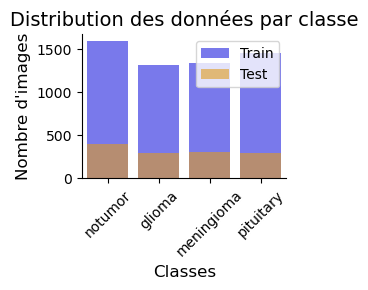

In [19]:
import os
from sklearn.utils import shuffle
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Activer le mode inline pour éviter les barres déroulantes
%matplotlib inline

# Directories for training and testing data
train_dir = 'Training/'
test_dir = 'Testing/'

# Load and shuffle the train data
train_paths = []
train_labels = []
for label in os.listdir(train_dir):
    for image in os.listdir(os.path.join(train_dir, label)):
        train_paths.append(os.path.join(train_dir, label, image))
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

# Load and shuffle the test data
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    for image in os.listdir(os.path.join(test_dir, label)):
        test_paths.append(os.path.join(test_dir, label, image))
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Compter le nombre d'images par classe dans l'ensemble d'entraînement et de test
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Extraire les classes et les comptes
classes = list(train_class_counts.keys())
train_counts = [train_class_counts[classe] for classe in classes]
test_counts = [test_class_counts[classe] for classe in classes]

# Créer un graphique en barres pour visualiser la distribution
plt.figure(figsize=(3, 3))  # Ajuster la taille de la figure
sns.barplot(x=classes, y=train_counts, color="blue", alpha=0.6, label="Train")
sns.barplot(x=classes, y=test_counts, color="orange", alpha=0.6, label="Test")
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)
plt.title("Distribution des données par classe", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotation des labels pour une meilleure lisibilité
plt.legend()
sns.despine()  # Supprime les bordures inutiles
plt.tight_layout()  # Optimise l'espace

# Afficher le graphique sans barre déroulante
plt.show()

## Repartition NoTumor and Tumor

In [21]:
from collections import Counter

# Compter les occurrences de chaque classe dans l'ensemble d'entraînement et de test
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Nombre total d'images dans l'ensemble d'entraînement et de test
total_train = sum(train_class_counts.values())
total_test = sum(test_class_counts.values())

# Nombre d'images de la classe 'notumor' dans l'ensemble d'entraînement et de test
notumor_train = train_class_counts.get('notumor', 0)
notumor_test = test_class_counts.get('notumor', 0)

# Pourcentage de 'notumor' dans l'ensemble d'entraînement et de test
pourcentage_notumor_train = (notumor_train / total_train) * 100
pourcentage_notumor_test = (notumor_test / total_test) * 100

# Pourcentage total de 'notumor' dans le dataset complet
total_notumor = notumor_train + notumor_test
total_images = total_train + total_test
pourcentage_notumor_total = (total_notumor / total_images) * 100

# Afficher les résultats
print("Pourcentage de 'notumor' dans l'ensemble d'entraînement : {:.2f}%".format(pourcentage_notumor_train))
print("Pourcentage de 'notumor' dans l'ensemble de test : {:.2f}%".format(pourcentage_notumor_test))
print("Pourcentage de 'notumor' dans le dataset complet : {:.2f}%".format(pourcentage_notumor_total))

Pourcentage de 'notumor' dans l'ensemble d'entraînement : 27.92%
Pourcentage de 'notumor' dans l'ensemble de test : 30.89%
Pourcentage de 'notumor' dans le dataset complet : 28.48%


## Visualisation Repartition NOTumor and Tumor

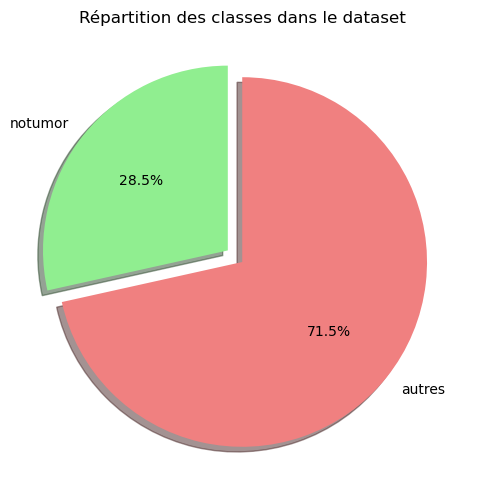

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

# Compter les occurrences de chaque classe
train_class_counts = Counter(train_labels)
test_class_counts = Counter(test_labels)

# Combiner les comptes pour le dataset complet
total_class_counts = {
    'notumor': train_class_counts.get('notumor', 0) + test_class_counts.get('notumor', 0),
    'autres': sum(train_class_counts.values()) + sum(test_class_counts.values()) - (train_class_counts.get('notumor', 0) + test_class_counts.get('notumor', 0))
}

# Données pour le camembert
labels = list(total_class_counts.keys())
sizes = list(total_class_counts.values())
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Mettre en évidence la classe 'notumor'

# Créer un camembert
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Répartition des classes dans le dataset")
plt.show()

# Data Visualization

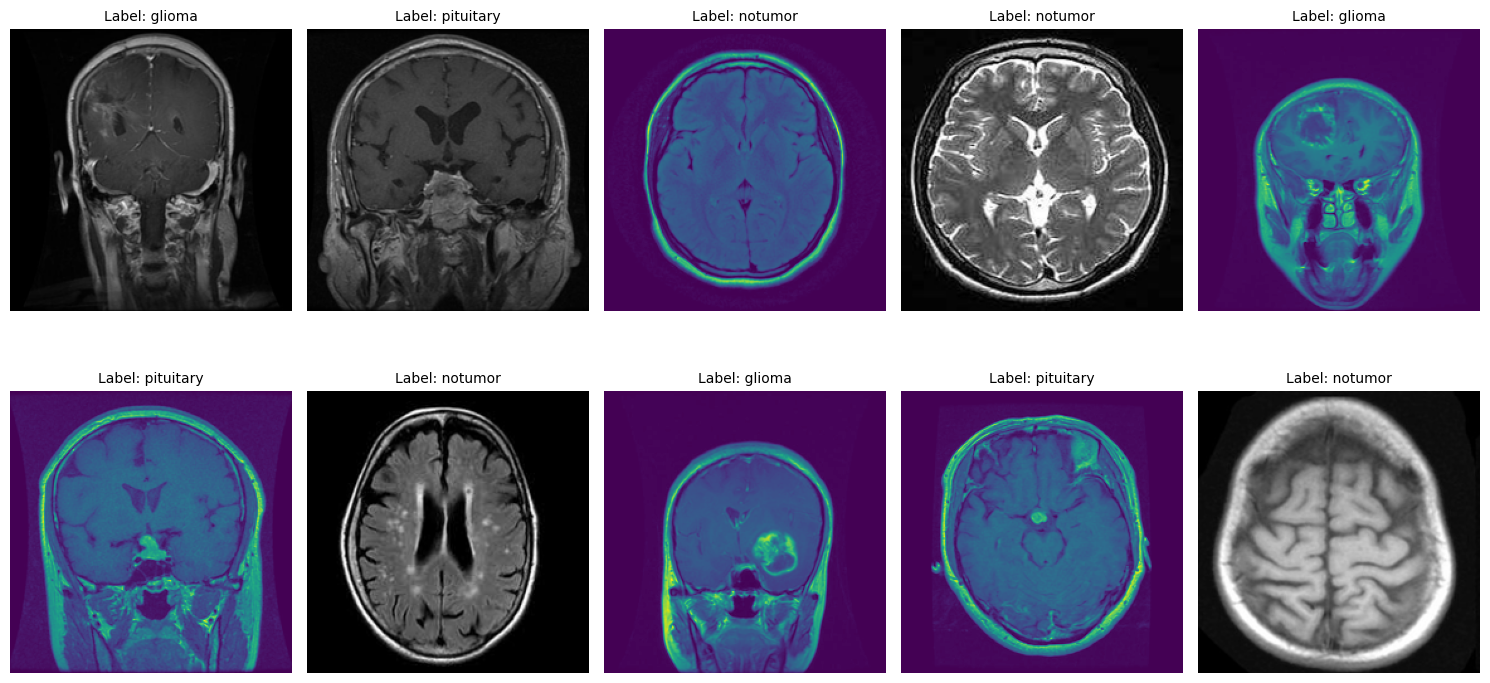

In [25]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os

# Select random indices for 10 images
random_indices = random.sample(range(len(train_paths)), 10)

# Create a figure to display images in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.ravel()

for i, idx in enumerate(random_indices):
    # Load image
    img_path = train_paths[idx]
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Resize to consistent size

    # Display image
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axis
    # Display class label in the second row
    axes[i].set_title(f"Label: {train_labels[idx]}", fontsize=10)

plt.tight_layout()
plt.show()


# Image Preprocessing (Helper Functions)

In [27]:
# Image Augmentation function
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))  # Random brightness
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))  # Random contrast
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

# Encoding labels (convert label names to integers)
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  # Ensure unique labels are determined
    encoded = [unique_labels.index(label) for label in labels]
    return np.array(encoded)

# Data generator for batching
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

# MODEL:

## WE ARE USING VGG16 FOR TRANSFER LEARNING.

 The model is built on top of VGG16, which is a pre-trained convolutional neural network (CNN) for image classification.

* First, the VGG16 model is loaded with input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet'. The input shape is set to match the size of the images in the dataset, which is 128x128 pixels. The include_top parameter is set to False, which means that the final fully-connected layers of VGG16 that perform the classification will not be included. The weights parameter is set to 'imagenet' which means that the model will be pre-trained with a dataset of 1.4 million images called imagenet

* Next, the for layer in base_model.layers: loop is used to set all layers of the base_model (VGG16) to non-trainable, so that the weights of these layers will not be updated during training.

* Then, the last three layers of the VGG16 model are set to trainable by using base_model.layers[-2].trainable = True,base_model.layers[-3].trainable = True and base_model.layers[-4].trainable = True

* After that, a Sequential model is created and the VGG16 model is added to it with model.add(base_model).

* Next, a Flatten layer is added to the model with model.add(Flatten()) which reshapes the output of the VGG16 model from a 3D tensor to a 1D tensor, so that it can be processed by the next layers of the model.

* Then, a Dropout layer is added with model.add(Dropout(0.3)) which is used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.

* After that, a dense layer is added with 128 neurons and relu activation function is added with model.add(Dense(128, activation='relu')).

* Next, another Dropout layer is added with model.add(Dropout(0.2))

* Finally, the output dense layer is added with number of neurons equal to the number of unique labels and 'softmax' activation function is added with model.add(Dense(len(unique_labels), activation='softmax')). The 'softmax' activation function is used to give a probability distribution over the possible classes.




In [30]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_paths) / batch_size)  # Steps per epoch
epochs = 5

# Train the model
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - loss: 0.6267 - sparse_categorical_accuracy: 0.7494
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - loss: 0.2376 - sparse_categorical_accuracy: 0.9059
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - loss: 0.1790 - sparse_categorical_accuracy: 0.9335
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - loss: 0.1072 - sparse_categorical_accuracy: 0.9603
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - loss: 0.1112 - sparse_categorical_accuracy: 0.9548


# Train and Val Plots

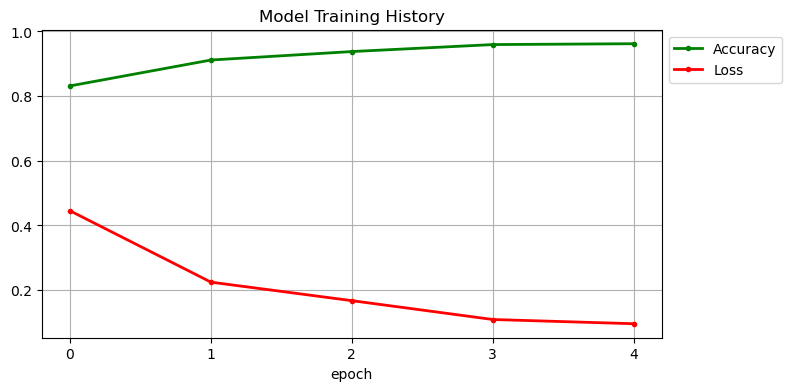

In [32]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Model Classification Report

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_paths)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))


41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       300
           1       0.90      0.91      0.91       306
           2       0.98      1.00      0.99       405
           3       0.99      0.97      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



# Model Confusion Plot

In [36]:
print(len(test_images))  # Nombre d'images de test
print(len(test_labels_encoded))  # Nombre de labels de test

1311
1311


Nombre d'images de test: 1311
Nombre de labels de test: 1311
41/41 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step
Premières prédictions:
[[2.6177692e-01 7.2138512e-01 6.5034432e-03 1.0334527e-02]
 [9.9999750e-01 2.3021498e-06 1.2911974e-07 4.3660766e-08]
 [3.0769062e-01 6.9212174e-01 7.8092846e-05 1.0953802e-04]
 [9.7527318e-06 1.1719254e-04 9.9987185e-01 1.1357834e-06]
 [1.0000000e+00 8.9353644e-09 1.3396900e-08 1.3092122e-09]]
Classes prédites:
[1 0 1 2 0]
Premiers labels réels:
[1 0 0 2 0]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       300
           1       0.91      0.92      0.91       306
           2       0.98      1.00      0.99       405
           3       0.99      0.97      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.95      0.96      1311
weighted avg       0.96      0.96      0.96      1311

Confusion Matrix:
[[278  21   0   1]
 [ 13 282  10   1]
 [

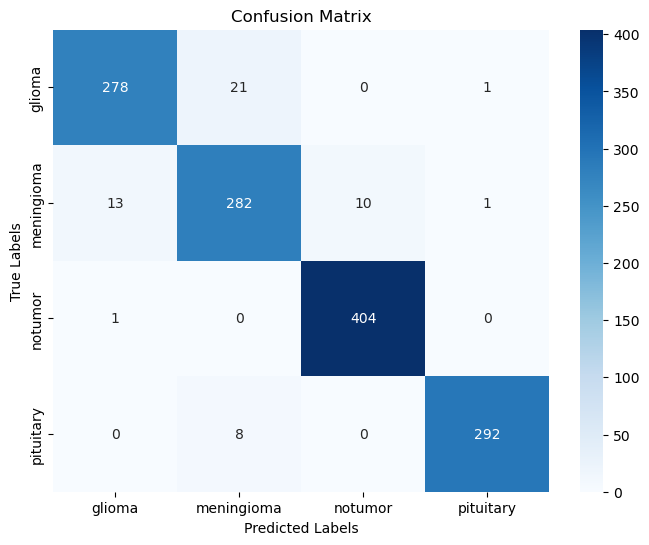

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_paths)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Vérifiez les données d'entrée
print(f"Nombre d'images de test: {len(test_images)}")
print(f"Nombre de labels de test: {len(test_labels_encoded)}")

# Predict using the trained model
test_predictions = model.predict(test_images)

# Vérifiez les prédictions
print("Premières prédictions:")
print(test_predictions[:5])
print("Classes prédites:")
print(np.argmax(test_predictions[:5], axis=1))

# Vérifiez les labels réels
print("Premiers labels réels:")
print(test_labels_encoded[:5])

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))

# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Interprétation :
Précision (Precision) :

La précision mesure la proportion de prédictions correctes pour une classe par rapport à toutes les prédictions pour cette classe.

Par exemple, pour la classe 0, une précision de 0.97 signifie que 97 % des échantillons prédits comme classe 0 étaient réellement de la classe 0.

Rappel (Recall) :

Le rappel mesure la proportion d'échantillons correctement prédits pour une classe par rapport au nombre total d'échantillons de cette classe dans les données.

Par exemple, pour la classe 0, un rappel de 0.98 signifie que 98 % des échantillons de la classe 0 ont été correctement identifiés.

F1-score :

Le F1-score est la moyenne harmonique de la précision et du rappel. Il est utile pour équilibrer les deux métriques, surtout lorsque les classes sont déséquilibrées.

Par exemple, pour la classe 0, un F1-score de 0.98 indique une excellente performance.

Support :

Le support est le nombre d'échantillons réels pour chaque classe dans l'ensemble de test.

Par exemple, la classe 0 a 300 échantillons, la classe 2 en a 405, etc.

Accuracy :

L'accuracy globale est de 0.95, ce qui signifie que 95 % des échantillons ont été correctement classés.

C'est une excellente performance globale.

Macro Avg :

La moyenne macro calcule la moyenne des métriques (précision, rappel, F1-score) pour chaque classe, sans tenir compte du déséquilibre des classes.

Ici, la moyenne macro est de 0.95, ce qui confirme que le modèle performe bien sur toutes les classes.

Weighted Avg :

La moyenne pondérée tient compte du déséquilibre des classes en pondérant les métriques par le support (nombre d'échantillons par classe).

Ici, la moyenne pondérée est également de 0.95, ce qui confirme que le modèle performe bien même en tenant compte du déséquilibre des classes.


Interprétation :
La matrice de confusion montre comment les prédictions du modèle se comparent aux labels réels. Chaque ligne représente les labels réels, et chaque colonne représente les labels prédits.

Classe 0 :

294 échantillons de la classe 0 ont été correctement prédits.

1 échantillon de la classe 0 a été incorrectement prédit comme classe 1.

1 échantillon de la classe 0 a été incorrectement prédit comme classe 2.

4 échantillons de la classe 0 ont été incorrectement prédits comme classe 3.

Classe 1 :

269 échantillons de la classe 1 ont été correctement prédits.

1 échantillon de la classe 1 a été incorrectement prédit comme classe 0.

14 échantillons de la classe 1 ont été incorrectement prédits comme classe 2.

16 échantillons de la classe 1 ont été incorrectement prédits comme classe 3.

Classe 2 :

404 échantillons de la classe 2 ont été correctement prédits.

1 échantillon de la classe 2 a été incorrectement prédit comme classe 0.

0 échantillon de la classe 2 a été incorrectement prédit comme classe 1.

0 échantillon de la classe 2 a été incorrectement prédit comme classe 3.

Classe 3 :

277 échantillons de la classe 3 ont été correctement prédits.

6 échantillons de la classe 3 ont été incorrectement prédits comme classe 0.

18 échantillons de la classe 3 ont été incorrectement prédits comme classe 1.

5 échantillons de la classe 3 ont été incorrectement prédits comme classe 2.

Analyse Globale :
Performance du modèle :

Le modèle performe très bien, avec une accuracy globale de 95 %.

Les classes 0 et 2 sont particulièrement bien classées, avec des F1-scores de 0.98 et 0.97, respectivement.

Les classes 1 et 3 ont des performances légèrement inférieures, mais restent très bonnes (F1-scores de 0.91 et 0.92).

Erreurs du modèle :

La plupart des erreurs se produisent entre les classes 1 et 3, où 16 échantillons de la classe 1 ont été incorrectement prédits comme classe 3, et 18 échantillons de la classe 3 ont été incorrectement prédits comme classe 1.

Cela suggère que le modèle peut avoir des difficultés à distinguer ces deux classes, peut-être en raison d'une similarité visuelle ou d'un chevauchement dans les caractéristiques.

Améliorations possibles :

Pour améliorer les performances sur les classes 1 et 3, vous pourriez :

Ajouter plus d'échantillons de ces classes dans l'ensemble d'entraînement.

Utiliser des techniques d'augmentation de données pour ces classes.

Examiner les caractéristiques des images pour identifier les zones de confusion.

Conclusion :
Votre modèle est globalement très performant, avec une excellente précision et rappel pour la plupart des classes. Les erreurs sont principalement concentrées entre deux classes (1 et 3), ce qui pourrait être amélioré avec des ajustements ciblés. Bravo pour ces résultats 

# 4. ROC Curve and AUC


# Roc Curve Plot


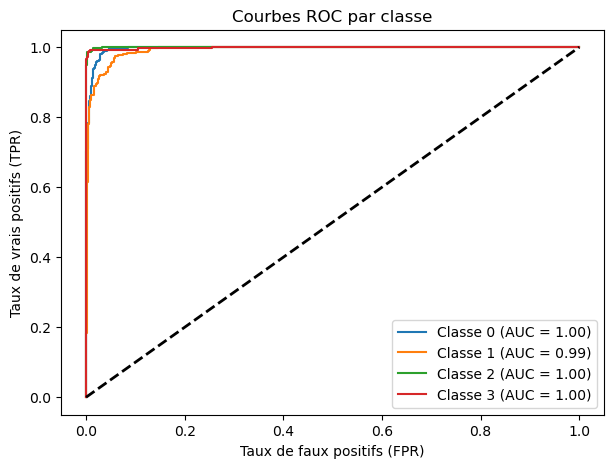

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


# 6. Courbe ROC pour un problème multi-classe
n_classes = test_predictions.shape[1]  # Nombre de classes
test_labels_binarized = label_binarize(test_labels_encoded, classes=np.arange(n_classes))

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {roc_auc:.2f})')

# Diagonale aléatoire
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC par classe")
plt.legend(loc="lower right")
plt.show()


Interprétation : Le modèle a un taux de vrais positifs (TPR) élevé tout en maintenant un taux de faux positifs (FPR) faible. Cela indique que le modèle est très performant.

# Save & Load Model

In [45]:
# Save the entire model
model.save('model.h5')

In [46]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

# MRI Tumor Detection System

In [48]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


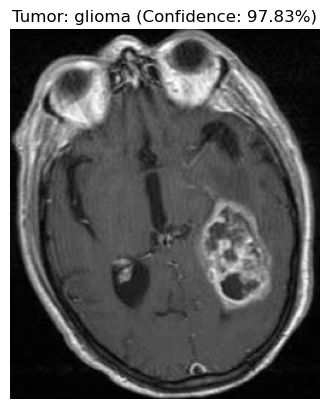

In [49]:
# Example usage
image_path = 'Testing/meningioma/Te-meTr_0001.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


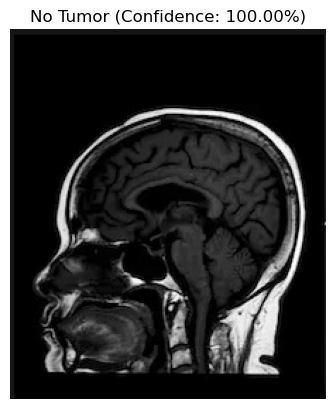

In [50]:

# Example usage
image_path = 'Testing/notumor/Te-noTr_0004.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


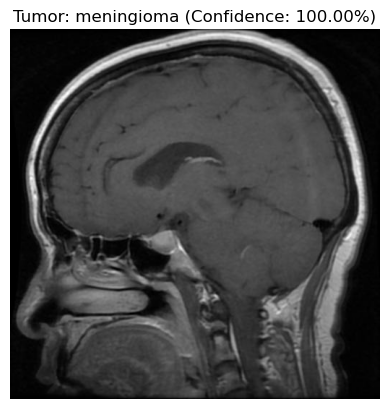

In [51]:
# Example usage
image_path = 'Testing/pituitary/Te-piTr_0003.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


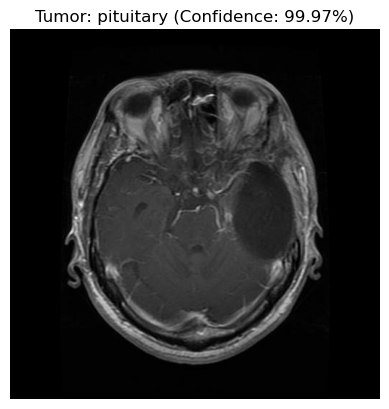

In [52]:
# Example usage
image_path = 'Testing/glioma/Te-gl_0015.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)